In [1]:
import torch
import numpy as np
from matplotlib import pyplot as plt
from random import randint

In [2]:
def maps_func(x):
    x -= (t3 := x // 3) * 3
    t2 = x // 2
    return t3 * 12 + t2 * 7

prices = {
    "chest": lambda x: x * 5,
    "necklace": lambda x: x * 3,
    "barrel": lambda x: x * 1,
    "hook": lambda x: x * 1,
    "map": maps_func,
}
prices_list = list(prices.values())
loot_names = [
    "chest",
    "necklace",
    "barrel",
    "hook",
    "map",
]

In [3]:
max_items = 100

X = [
    [
        randint(0, max_items),
        randint(0, max_items),
        randint(0, max_items),
        randint(0, max_items),
        randint(0, max_items)
    ]
    for _ in range(300)
]

In [4]:
X

[[100, 18, 94, 29, 35],
 [39, 83, 56, 51, 66],
 [52, 29, 28, 77, 35],
 [33, 57, 69, 63, 33],
 [3, 42, 79, 0, 8],
 [13, 16, 35, 1, 49],
 [38, 7, 73, 3, 22],
 [38, 36, 32, 94, 97],
 [61, 25, 94, 21, 49],
 [43, 73, 56, 64, 16],
 [4, 57, 21, 25, 27],
 [93, 83, 49, 82, 94],
 [7, 60, 89, 62, 44],
 [49, 71, 34, 3, 50],
 [12, 25, 75, 24, 18],
 [21, 24, 0, 29, 74],
 [52, 55, 87, 34, 38],
 [20, 52, 65, 24, 54],
 [32, 97, 91, 91, 42],
 [34, 7, 74, 22, 93],
 [1, 24, 87, 22, 30],
 [67, 40, 81, 18, 18],
 [46, 17, 56, 74, 40],
 [50, 77, 92, 98, 31],
 [80, 9, 74, 28, 44],
 [84, 45, 43, 5, 21],
 [8, 62, 21, 93, 100],
 [69, 99, 49, 50, 62],
 [36, 55, 9, 19, 100],
 [1, 26, 19, 20, 97],
 [13, 53, 63, 24, 21],
 [25, 33, 30, 75, 57],
 [34, 19, 27, 36, 59],
 [17, 57, 95, 86, 35],
 [43, 41, 11, 9, 8],
 [42, 84, 68, 69, 79],
 [1, 31, 67, 2, 78],
 [71, 19, 16, 3, 42],
 [89, 54, 66, 39, 65],
 [91, 71, 28, 46, 31],
 [12, 35, 100, 37, 50],
 [50, 26, 47, 38, 90],
 [95, 21, 81, 26, 82],
 [27, 95, 94, 33, 14],
 [96, 

In [5]:
Y = [
    [sum([prices_list[i](x_arr[i]) for i in range(len(x_arr))])]
    for x_arr in X
]

In [6]:
Y

[[816],
 [815],
 [591],
 [600],
 [251],
 [341],
 [371],
 [808],
 [687],
 [614],
 [345],
 [1217],
 [541],
 [694],
 [306],
 [501],
 [697],
 [561],
 [801],
 [659],
 [306],
 [626],
 [567],
 [791],
 [704],
 [687],
 [736],
 [988],
 [769],
 [506],
 [395],
 [557],
 [525],
 [576],
 [389],
 [911],
 [479],
 [599],
 [971],
 [862],
 [501],
 [773],
 [969],
 [602],
 [974],
 [271],
 [682],
 [704],
 [836],
 [811],
 [655],
 [432],
 [660],
 [701],
 [457],
 [1056],
 [663],
 [276],
 [585],
 [640],
 [737],
 [844],
 [321],
 [724],
 [671],
 [520],
 [983],
 [628],
 [1023],
 [845],
 [807],
 [378],
 [929],
 [810],
 [759],
 [699],
 [947],
 [799],
 [773],
 [677],
 [808],
 [532],
 [462],
 [490],
 [192],
 [689],
 [924],
 [1016],
 [970],
 [699],
 [971],
 [715],
 [583],
 [819],
 [697],
 [800],
 [846],
 [916],
 [519],
 [661],
 [221],
 [861],
 [613],
 [866],
 [544],
 [744],
 [216],
 [564],
 [738],
 [768],
 [475],
 [820],
 [722],
 [648],
 [725],
 [648],
 [900],
 [491],
 [527],
 [1021],
 [509],
 [535],
 [620],
 [1012],
 [

In [7]:
from sklearn.model_selection import train_test_split

seed = 42
X_train, X_test, Y_train, Y_test = map(
    torch.Tensor,
    train_test_split(
        X, 
        Y,
        test_size=0.2,
        random_state=seed
    )
)


In [8]:
class SimpleLinearModel(torch.nn.Module):
    def __init__(self) -> None:
        super().__init__()
        self.layers = torch.nn.Sequential(
            torch.nn.Linear(5, 1)
        )
    
    def forward(self, X):
        return self.layers(X)

In [20]:
game_model = SimpleLinearModel()
loss_fn = torch.nn.MSELoss()
optimizer = torch.optim.SGD(game_model.parameters(), lr=0.01)

In [21]:
def train_step(model: torch.nn.Module, x, y, loss_fn, optimizer):
    model.train()
    y_pred = model(x)
    loss = loss_fn(y_pred, y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    return loss.item()

def test_step(model: torch.nn.Module, x, y, epoch, loss_fn):
    model.eval()
    with torch.inference_mode():
        test_y_pred = model(x)
        test_loss = loss_fn(test_y_pred, y)
        print(f"Epoch {epoch} | Test loss: {test_loss} | Test std {test_y_pred.squeeze().std()}")

In [22]:
loss_data = []

epochs = 10000
for epoch in range(epochs):

    game_model.train()
    y_pred = game_model(X_train)
    loss = loss_fn(y_pred, Y_train)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    loss_data.append(loss.item())

    # 1. Disable train mode 
    game_model.train(mode=False)
    # 2. Make predictions for the train dataset
    test_y_pred = game_model(X_test)
    # 3. Calculate train set loss
    test_loss = loss_fn(test_y_pred, Y_test)

    if epoch % 100 == 0:
        print(f"Epoch {epoch} | Test loss: {test_loss.item()}")

    #loss_data.append(train_step(game_model, X_train, Y_train, loss_fn, optimizer))
    #test_step(game_model, x=X_test, y=Y_test, epoch=epoch, loss_fn=loss_fn)

Epoch 0 | Test loss: 739.105224609375
Epoch 100 | Test loss: 495.2054138183594
Epoch 200 | Test loss: 253.1896209716797
Epoch 300 | Test loss: 89.60678100585938
Epoch 400 | Test loss: 67.5846939086914
Epoch 500 | Test loss: 52.72605895996094
Epoch 600 | Test loss: 36.28849792480469
Epoch 700 | Test loss: 18.375768661499023
Epoch 800 | Test loss: 1.5773882865905762
Epoch 900 | Test loss: 1.5451632738113403
Epoch 1000 | Test loss: 1.5303360223770142
Epoch 1100 | Test loss: 1.522533893585205
Epoch 1200 | Test loss: 1.5257298946380615
Epoch 1300 | Test loss: 1.521777868270874
Epoch 1400 | Test loss: 1.5177693367004395
Epoch 1500 | Test loss: 1.533899188041687
Epoch 1600 | Test loss: 1.529429316520691
Epoch 1700 | Test loss: 1.5191625356674194
Epoch 1800 | Test loss: 1.5171252489089966
Epoch 1900 | Test loss: 1.5155177116394043
Epoch 2000 | Test loss: 1.5017426013946533
Epoch 2100 | Test loss: 1.4962254762649536
Epoch 2200 | Test loss: 1.4855647087097168
Epoch 2300 | Test loss: 1.4843974113

C:\Users\dewre\AppData\Local\Temp\ipykernel_12604\2912231580.py:4: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


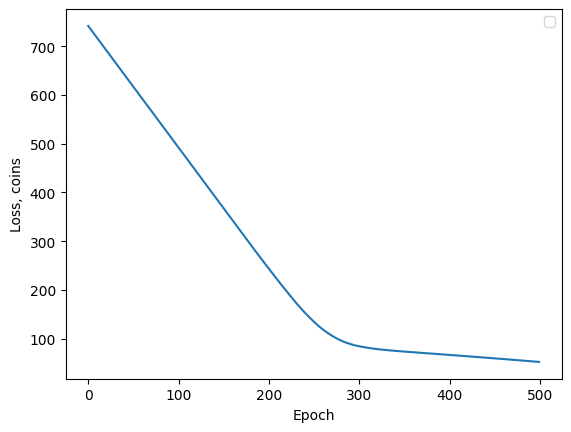

In [23]:
plt.plot(list(range(500)), loss_data[:500])
plt.xlabel('Epoch')
plt.ylabel('Loss, coins')
plt.legend()

In [25]:
dict(game_model.state_dict())

{'layers.0.weight': tensor([[4.9952, 3.0017, 1.0016, 0.9963, 3.9992]]),
 'layers.0.bias': tensor([-0.6496])}

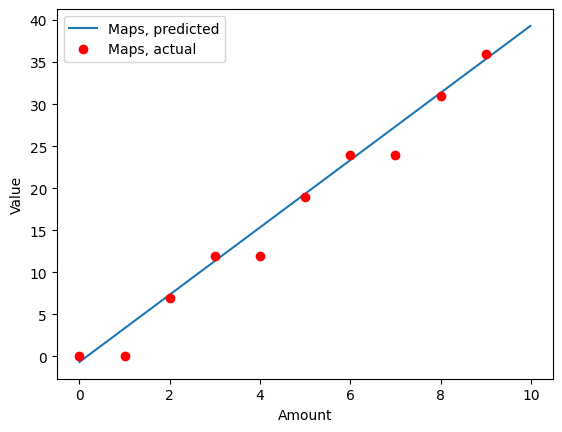

In [24]:
maps_data = game_model(torch.Tensor([[0, 0, 0, 0, x / 100] for x in range(1000)]))
plt.plot([x / 100 for x in range(1000)], maps_data.detach().numpy(), label='Maps, predicted')
for x in range(10):
    actual_maps_val, = plt.plot(x, maps_func(x), 'ro')
actual_maps_val.set_label('Maps, actual')
plt.xlabel('Amount')
plt.ylabel('Value')
plt.legend()


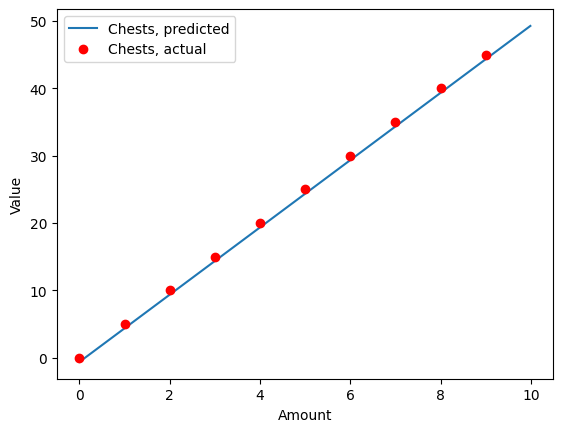

In [26]:
maps_data = game_model(torch.Tensor([[x / 100, 0, 0, 0, 0] for x in range(1000)]))
plt.plot([x / 100 for x in range(1000)], maps_data.detach().numpy(), label='Chests, predicted')
for x in range(10):
    actual_maps_val, = plt.plot(x, x * 5, 'ro')
actual_maps_val.set_label('Chests, actual')
plt.xlabel('Amount')
plt.ylabel('Value')
plt.legend()